## Support Vector Regression

Support Vector Regression (SVR) works on similar principles as Support Vector Machine (SVM) classification. One can say that SVR is the adapted form of SVM when the dependent variable is numerical rather than categorical. A major benefit of using SVR is that it is a non-parametric technique. Unlike SLR, whose results depend on Gauss-Markov assumptions, the output model from SVR does not depend on distributions of the underlying dependent and independent variables. Instead the SVR technique depends on kernel functions. Another advantage of SVR is that it permits for construction of a non-linear model without changing the explanatory variables, helping in better interpretation of the resultant model. The basic idea behind SVR is not to care about the prediction as long as the error (ϵi) is less than certain value. This is known as the principle of maximal margin. This idea of maximal margin allows viewing SVR as a convex optimization problem. The regression can also be penalized using a cost parameter, which becomes handy to avoid over-fit. SVR is a useful technique provides the user with high flexibility in terms of distribution of underlying variables, relationship between independent and dependent variables and the control on the penalty term.

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
#Gathering Data
credit = pd.read_csv(r"E:/Github/Python/Data-Sets/Risk.txt",sep=",",index_col=False)

In [3]:
#First 5 Rows of Data
credit.head()

ID  AGE  INCOME GENDER    MARITAL  NUMKIDS  NUMCARDS  HOWPAID MORTGAGE  \
0  100756   44   59944      m  married          1         2  monthly        y   
1  100668   35   59692      m  married          1         1  monthly        y   
2  100418   34   59508      m  married          1         1  monthly        y   
3  100416   34   59463      m  married          0         2  monthly        y   
4  100590   39   59393      f  married          0         2  monthly        y   

   STORECAR  LOANS        RISK  
0         2      0  good risk   
1         1      0  bad loss    
2         2      1  good risk   
3         1      1  bad loss    
4         1      0  good risk

In [4]:
#Selecting X and Y variables 
X = credit[['AGE','NUMKIDS','NUMCARDS','LOANS']]
y = credit['INCOME']
numerics = credit[['AGE','NUMKIDS','NUMCARDS','LOANS','INCOME']]

In [5]:
#Printing x variables
print('X:\n', X.head())
print('')
#Printing y variable
print('y:\n', y.head())

X:
    AGE  NUMKIDS  NUMCARDS  LOANS
0   44        1         2      0
1   35        1         1      0
2   34        1         1      1
3   34        0         2      1
4   39        0         2      0

y:
 0    59944
1    59692
2    59508
3    59463
4    59393
Name: INCOME, dtype: int64


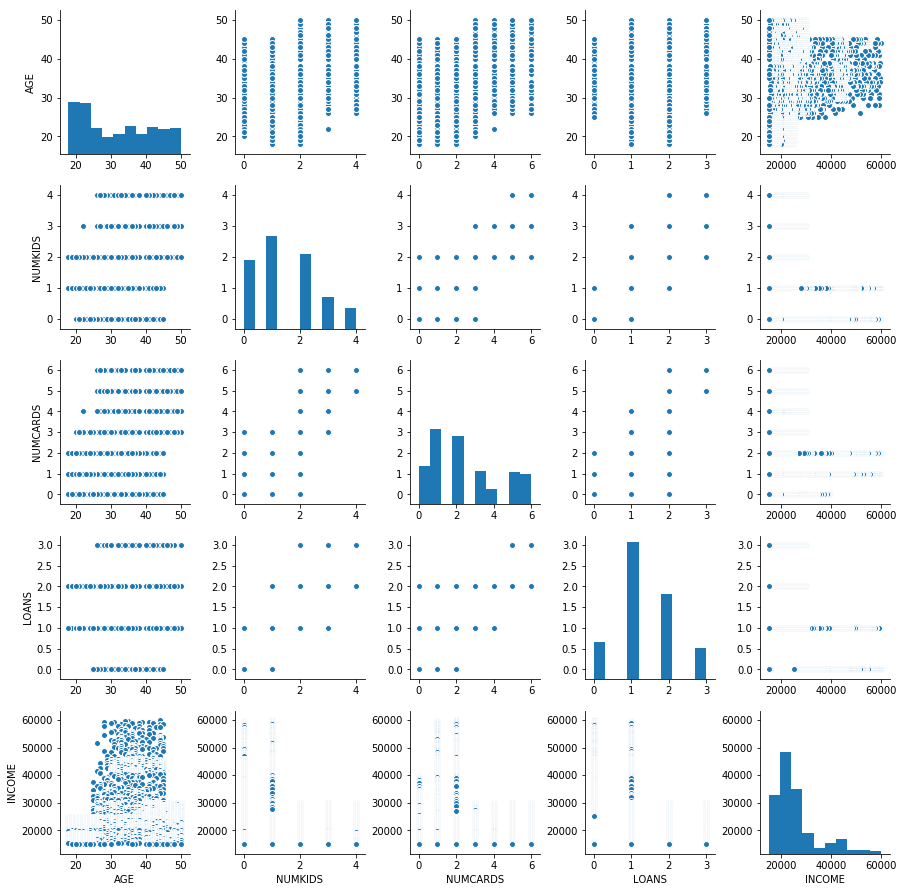

In [6]:
#Pair plot
sns.pairplot(numerics)

In [7]:
#Loading train test split library
from sklearn.model_selection import train_test_split

In [8]:
#Creating X and y train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [9]:
#Loading Library
from sklearn import svm
svr = svm.SVR()

In [10]:
#Applying model
svr.fit (X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
#Making predictions
y_train_predictions = svr.predict(X_train)
y_test_predictions = svr.predict(X_test)

Text(0,0.5,'y_train')

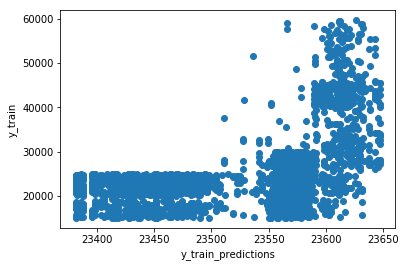

In [12]:
#Plotting the predicted and real values of y
plt.scatter(y_train_predictions,y_train)
plt.xlabel('y_train_predictions')
plt.ylabel('y_train')

Text(0,0.5,'y_test')

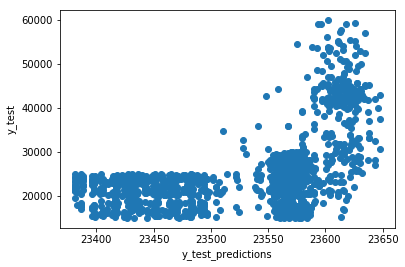

In [13]:
#Plotting the predicted and real values of y
plt.scatter(y_test_predictions,y_test)
plt.xlabel('y_test_predictions')
plt.ylabel('y_test')

In [14]:
#Loading Library
#Choosing different parameters
from sklearn import svm
svr = svm.SVR(kernel='linear')

In [15]:
#Applying model
svr.fit (X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
#Making predictions
y_train_linear_predictions = svr.predict(X_train)
y_test_linear_predictions = svr.predict(X_test)

Text(0,0.5,'y_train')

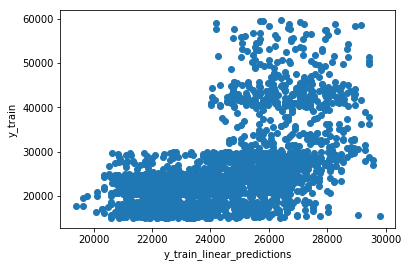

In [17]:
#Plotting the predicted and real values of y
plt.scatter(y_train_linear_predictions,y_train)
plt.xlabel('y_train_linear_predictions')
plt.ylabel('y_train')

Text(0,0.5,'y_test')

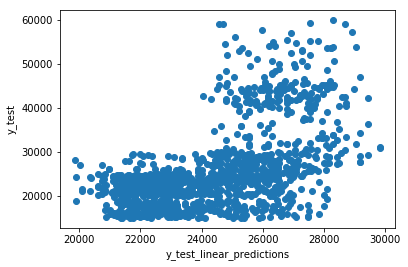

In [18]:
#Plotting the predicted and real values of y
plt.scatter(y_test_linear_predictions,y_test)
plt.xlabel('y_test_linear_predictions')
plt.ylabel('y_test')

In [19]:
#Loading Library
#Choosing different parameters
from sklearn import svm
svr = svm.SVR(kernel='rbf',C=0.01)

In [20]:
#Applying model
svr.fit (X_train,y_train)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
#Making predictions
y_train_rbf_c_001_predictions = svr.predict(X_train)
y_test_rbf_c_001_predictions = svr.predict(X_test)

Text(0,0.5,'y_train')

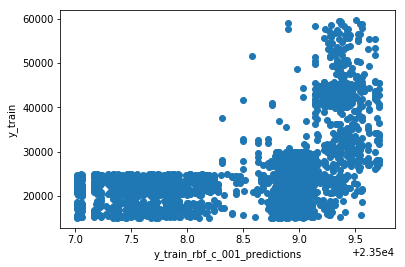

In [22]:
#Plotting the predicted and real values of y
plt.scatter(y_train_rbf_c_001_predictions,y_train)
plt.xlabel('y_train_rbf_c_001_predictions')
plt.ylabel('y_train')

Text(0,0.5,'y_test')

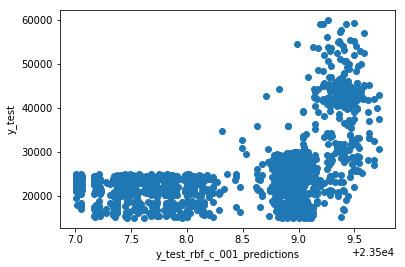

In [23]:
#Plotting the predicted and real values of y
plt.scatter(y_test_rbf_c_001_predictions,y_test)
plt.xlabel('y_test_rbf_c_001_predictions')
plt.ylabel('y_test')

In [25]:
#Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
#The coefficients
#The mean squared error
print("Mean squared error train base model:",mean_squared_error(y_train, y_train_predictions))
print('')
#The mean squared error
print("Mean squared error test base model:",mean_squared_error(y_test, y_test_predictions))
print('')
#The mean squared error
print("Mean squared error train linear model:",mean_squared_error(y_train, y_train_linear_predictions))
print('')
#The mean squared error
print("Mean squared error test linear model:",mean_squared_error(y_test, y_test_linear_predictions))
print('')
#The mean squared error
print("Mean squared error train rbf c = 0.01 model:",mean_squared_error(y_train, y_train_rbf_c_001_predictions))
print('')
#The mean squared error
print("Mean squared error test rbf c = 0.01 model:",mean_squared_error(y_test, y_test_rbf_c_001_predictions))
print('')

Mean squared error train base model: 78547973.0398

Mean squared error test base model: 84015890.4838

Mean squared error train linear model: 61686363.3084

Mean squared error test linear model: 65647654.3356

Mean squared error train rbf c = 0.01 model: 79310757.1445

Mean squared error test rbf c = 0.01 model: 84804023.7776

